# Surprise Housing price prediction
### By Sai Sasanka


In [127]:
# importing the required libraries

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# filtering out warnings
import warnings
warnings.filterwarnings('ignore')

# libraries for preprocessing and model building

from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# importing libraries for metric
from sklearn.metrics import mean_squared_error, r2_score

In [128]:
# Setting a few display options

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [129]:
# Reading the dataset

df = pd.read_csv("train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [130]:
# Looking at the info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

This dataset has missing values in some of the columns, proceeding towards missing value treatment

In [131]:
# shape of the df

df.shape

(1460, 81)

In [132]:
# Describing the df

df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Exploratory Data Analysis

## 1. Treating Missing Values

In [133]:
# Looking at the column wise percentage of missing values

missing_vals = (df.isnull().sum() / df.shape[0]) * 100

missing_vals[missing_vals > 0]

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

We may notice that a few columns have missing values greater than 80 %, choosing to drop these columns

In [134]:
# Dropping columns with missing values greater than 95 %

to_drop = ["Alley", "Fence", "PoolQC", "MiscFeature"]

df.drop(columns=to_drop, inplace=True)

In [135]:
# Looking at the missing values again

missing_vals = (df.isnull().sum() / df.shape[0]) * 100

missing_vals[missing_vals > 0]

LotFrontage     17.739726
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
dtype: float64

In [136]:
# Looking at "FireplaceQu" column

df.FireplaceQu.value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

For Fire place quality missing, we have to check if fireplace exists in the house in the first place

In [137]:
# Looking if fireplace exists or not for the missing values in "FireplaceQu"

df[df.FireplaceQu.isnull()].Fireplaces.value_counts()

0    690
Name: Fireplaces, dtype: int64

So, FireplaceQu is null where there are no fireplaces, We will replace the missing values with "NA" (acc. to data definition)

In [138]:
# Replacing missing values in FireplaceQu with "NA"

df.loc[df.FireplaceQu.isnull(), "FireplaceQu"] = "NA"

In [139]:
# Checking if the replacement is successfull

print(df.FireplaceQu.isnull().sum())

print(df.FireplaceQu.value_counts())

0
NA    690
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64


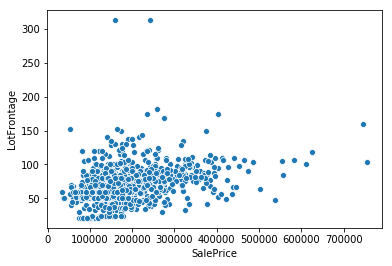

In [140]:
# Looking at LotFrontage it has 17 % missing values, plotting a scatter plot with the target variable


sns.scatterplot(y=df.LotFrontage, x=df.SalePrice)
plt.show()

We can see that the points are kind of clumped and there is no particular trend. Choosing to drop LotFrontage

In [141]:
# Dropping a few other variables as they don't have much correlation with the target variable

df.drop(columns=["LotFrontage", "Utilities", "Street"], inplace=True)

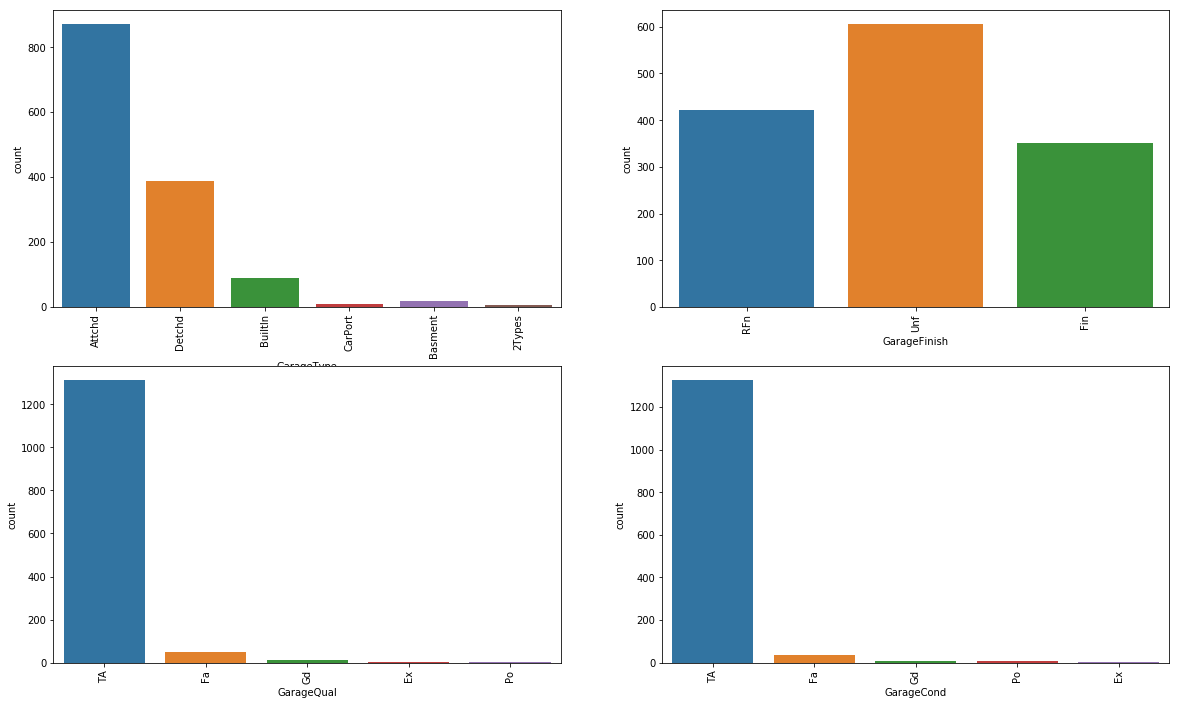

In [142]:
# Looking the "Garage" columns

# We will check if for each of these columns the "GarageCars" and "GarageArea"
# have any value other than '0'

g_cols = ["GarageType", "GarageFinish", "GarageQual", "GarageCond"]

plt.figure(figsize=(20, 12))

for idx, col in enumerate(g_cols):
    plt.subplot(2, 2, idx + 1)
    plt.xticks(rotation=90)
    sns.countplot(df[col])

plt.show()

Looking at the above results, we will impute the values with the mode of each column appropriately

In [143]:
# Replacing the missing values in the Garage columns with "NA"

df.GarageType.fillna('Attchd',inplace=True)
df.GarageFinish.fillna('Unf',inplace=True)
df.GarageQual.fillna('TA',inplace=True)
df.GarageCond.fillna('TA',inplace=True)

# Similarly for the below columns as well, we will be imputing using Mode / median (for numeric cols)

df.MasVnrType.fillna('None',inplace=True)
df.MasVnrArea.fillna(df.MasVnrArea.median(),inplace=True)
df.BsmtQual.fillna('TA',inplace=True)
df.BsmtCond.fillna('TA',inplace=True)
df.BsmtExposure.fillna('No',inplace=True)
df.BsmtFinType1.fillna('Unf',inplace=True)
df.BsmtFinType2.fillna('Unf',inplace=True)


In [144]:
# checking if the replacement is successfull

df[g_cols].isnull().sum()

GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
dtype: int64

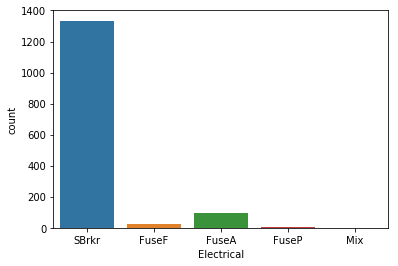

In [145]:
# Electrical column

sns.countplot(df.Electrical)
plt.show()

In [146]:
# imputing with mode for the Electrical column

df.Electrical.fillna("SBrkr", inplace=True)

Missing values have been treated (except for `GarageYrBuilt`, which will be done later)

## 2. Variable transformation

 - We have some columns which appear as cardinal categorical but are actually ordinal categorical as they have some order.
 - We will map the appropriate categories to the integers in those columns

1    1365
0      95
Name: CentralAir, dtype: int64


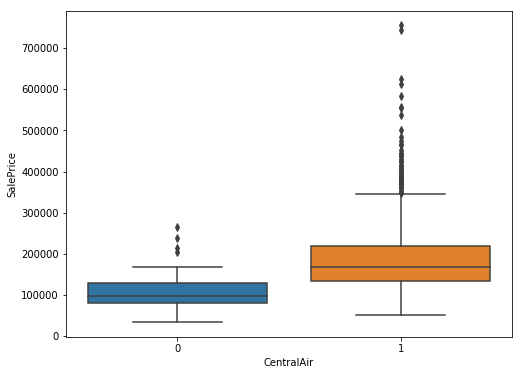

In [147]:
# Looking at CentralAir column
# It has values N, Y indicating a binary column, we will map these values to 0, 1

df["CentralAir"] = df.CentralAir.map({"N" : 0, "Y" : 1})
print(df.CentralAir.value_counts())

# Plotting the boxplot for further analysis
plt.figure(figsize=(8, 6))
sns.boxplot(y="SalePrice", x="CentralAir", data=df)
plt.show()


In case of Central air conditioning present for the house the price is higher

In [148]:
# Mapping all the ordinal columns which appear to be cardinal, to ordinal


df['LandSlope'] = df.LandSlope.map({'Gtl':0,'Mod':1,'Sev':2})
df['ExterQual'] = df.ExterQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})

df['BsmtQual'] = df.BsmtQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['BsmtCond'] = df.BsmtCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['BsmtExposure'] = df.BsmtExposure.map({'NA':0,'No':1,'Mn':2,'Av':3,'Gd':4})
df['BsmtFinType1'] = df.BsmtFinType1.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
df['BsmtFinType2'] = df.BsmtFinType2.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})

df['HeatingQC'] = df.HeatingQC.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['KitchenQual'] = df.KitchenQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})

df['GarageFinish'] = df.GarageFinish.map({'NA':0,'Unf':1,'RFn':2,'Fin':3})
df['GarageQual'] = df.GarageQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['GarageCond'] = df.GarageCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})

df['ExterCond'] = df.ExterCond.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['LotShape'] = df.LotShape.map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})

In [149]:
# Looking at the transformed columns

df[
    [
        'LandSlope', 'ExterQual',
        'BsmtQual','BsmtCond',
        'BsmtExposure','BsmtFinType1',
        'BsmtFinType2', 'HeatingQC',
        'CentralAir',  'KitchenQual', 
        'GarageFinish','GarageQual', 
        'GarageCond', 'ExterCond',
        'LotShape'
    ]
].head()

,LandSlope,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape
0,0,3,4,3,1,6,1,4,1,3,2,3,3,2,3
1,0,2,4,3,4,5,1,4,1,2,2,3,3,2,3
2,0,3,4,3,2,6,1,4,1,3,2,3,3,2,0
3,0,2,3,4,1,5,1,3,1,3,1,3,3,2,0
4,0,3,4,3,3,6,1,4,1,3,2,3,3,2,0


### 2.1 Treating the year columns and deriving new variables

We choose to create age columns from year columns

In [150]:
# These age columns would be relative to the max value in the year column

df['YearBuilt_age'] = df.YearBuilt.max() - df.YearBuilt
df['YearRemodAdd_age'] = df.YearRemodAdd.max() - df.YearRemodAdd
df['GarageYrBlt_age'] = df.GarageYrBlt.max() - df.GarageYrBlt
df['YrSold_age'] = df.YrSold.max() - df.YrSold

# GarageYrBlt has missing values, filling it with -1, as it would indicate no garage
df['GarageYrBlt_age'].fillna(-1, inplace=True)

df[['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold','YearBuilt_age','YearRemodAdd_age',
             'GarageYrBlt_age','YrSold_age']].sample(5)

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold,YearBuilt_age,YearRemodAdd_age,GarageYrBlt_age,YrSold_age
1330,2006,2006,2006.0,2007,4,4,4.0,3
564,1992,2000,1992.0,2006,18,10,18.0,4
729,1925,1950,1962.0,2009,85,60,48.0,1
362,2003,2003,2003.0,2009,7,7,7.0,1
160,1984,1984,1984.0,2008,26,26,26.0,2


In [151]:
# Dropping other year and month columns as they do not add any significance

df.drop(columns=["YearRemodAdd", "YrSold", "MoSold", "GarageYrBlt", "YearBuilt"], inplace=True)

The houses which are in the group of 10-45 years seems to have the highest prices, followed by houses in the group 115-150

## 3. Outlier Analysis

In [152]:
# Picking out all the continuous columns for further analysis

numeric_df = df.drop(columns=["Id"]).select_dtypes(include=["float64", "int64"])

numeric_df.head()

,MSSubClass,LotArea,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,YearBuilt_age,YearRemodAdd_age,GarageYrBlt_age,YrSold_age
0,60,8450,3,0,7,5,196.0,3,2,4,3,1,6,706,1,0,150,856,4,1,856,854,0,1710,1,0,2,1,3,1,3,8,0,2,2,548,3,3,0,61,0,0,0,0,0,208500,7,7,7.0,2
1,20,9600,3,0,6,8,0.0,2,2,4,3,4,5,978,1,0,284,1262,4,1,1262,0,0,1262,0,1,2,0,3,1,2,6,1,2,2,460,3,3,298,0,0,0,0,0,0,181500,34,34,34.0,3
2,60,11250,0,0,7,5,162.0,3,2,4,3,2,6,486,1,0,434,920,4,1,920,866,0,1786,1,0,2,1,3,1,3,6,1,2,2,608,3,3,0,42,0,0,0,0,0,223500,9,8,9.0,2
3,70,9550,0,0,7,5,0.0,2,2,3,4,1,5,216,1,0,540,756,3,1,961,756,0,1717,1,0,1,0,3,1,3,7,1,1,3,642,3,3,0,35,272,0,0,0,0,140000,95,40,12.0,4
4,60,14260,0,0,8,5,350.0,3,2,4,3,3,6,655,1,0,490,1145,4,1,1145,1053,0,2198,1,0,2,1,4,1,3,9,1,2,3,836,3,3,192,84,0,0,0,0,0,250000,10,10,10.0,2


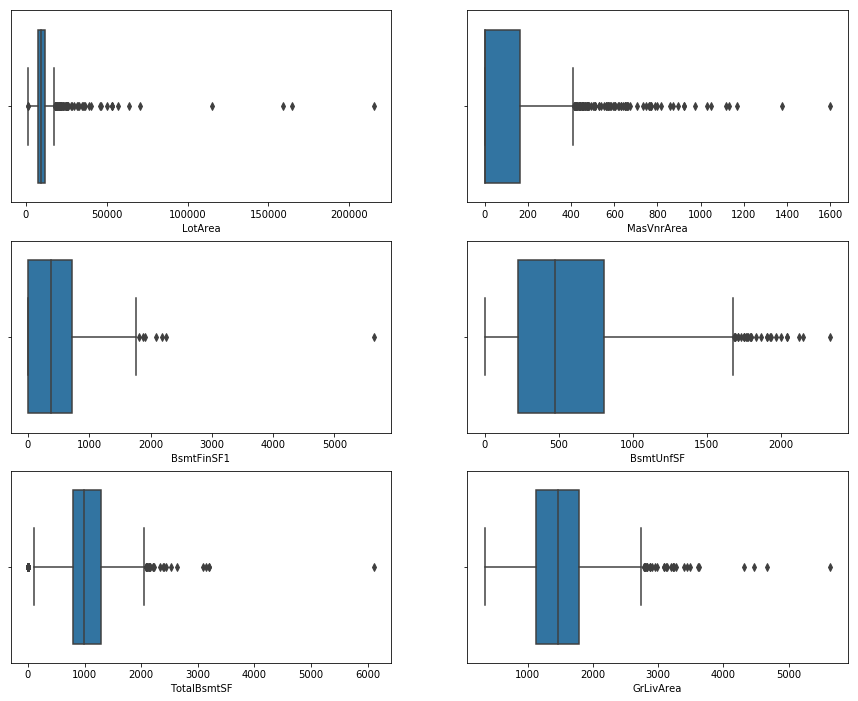

In [153]:
# Box plots for a few columns

plt.figure(figsize=(15, 12))

plt.subplot(3, 2, 1)
sns.boxplot(df.LotArea)

plt.subplot(3, 2, 2)
sns.boxplot(df.MasVnrArea)

plt.subplot(3, 2, 3)
sns.boxplot(df.BsmtFinSF1)

plt.subplot(3, 2, 4)
sns.boxplot(df.BsmtUnfSF)

plt.subplot(3, 2, 5)
sns.boxplot(df.TotalBsmtSF)

plt.subplot(3, 2, 6)
sns.boxplot(df.GrLivArea)

plt.show()

- MasVnrArea and LotArea seem to have a lot of outliers

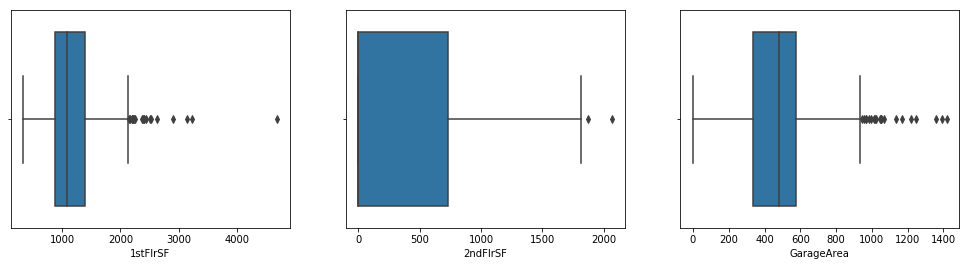

In [154]:
# Box plots for a few other columns

plt.figure(figsize=(17, 4))

plt.subplot(1, 3, 1)
sns.boxplot(df["1stFlrSF"])

plt.subplot(1, 3, 2)
sns.boxplot(df["2ndFlrSF"])

plt.subplot(1, 3, 3)
sns.boxplot(df.GarageArea)

plt.show()

1stFlrSF and GarageArea seem to be the prominent ones here

Choosing to drop outliers using IQR

In [155]:
# Choosing the columns for outlier treatment

to_remove = ['LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','TotalBsmtSF','1stFlrSF','GrLivArea','OpenPorchSF',
           'EnclosedPorch','3SsnPorch',
           'ScreenPorch' ,'PoolArea','MiscVal']

In [156]:
# Dropping the outliers in columns

for col in to_remove:
    quantiles = df[col].quantile([0.2, 0.99]).values
    IQR = quantiles[1] - quantiles[0]
    df = df[(df[col] >= quantiles[0] - (1.5 * IQR)) & (df[col] <= quantiles[1] + (1.5 * IQR))]

In [157]:
# Sale Price

quantiles = df["SalePrice"].quantile([0.2, 0.99]).values
IQR = quantiles[1] - quantiles[0]
df = df[(df["SalePrice"] >= quantiles[0] - (1.5 * IQR)) & (df["SalePrice"] <= quantiles[1] + (1.5 * IQR))]

df.shape

(1441, 73)

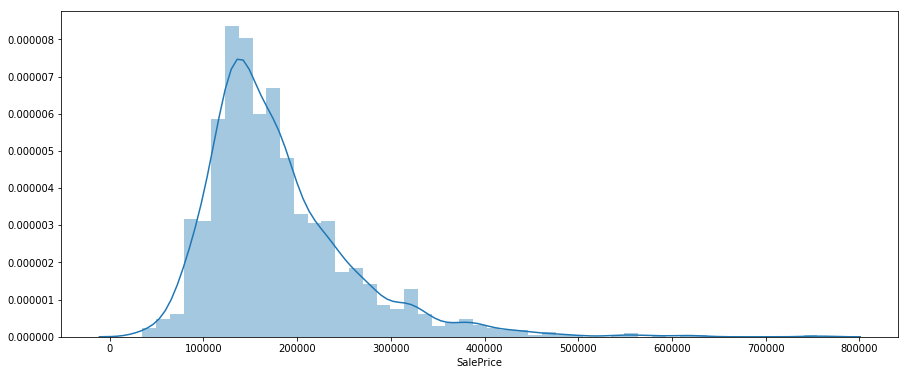

In [158]:
# Looking at the SalePrice column for outliers

plt.figure(figsize=(15, 6))

sns.distplot(df.SalePrice)

plt.show()

 - Sale Price distribution seems to be skewed, but removing the outliers would lead to a model which would fail to predict higher prices, so we choose to keep them
- But as the scale is higher we choose to standardize it after splitting into train and test sets

## Correlation

 - Since we are using regression method to model this data, it is essential to check for columns that are correlated with the target variable

In [159]:
numeric_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 50 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MSSubClass        1460 non-null   int64  
 1   LotArea           1460 non-null   int64  
 2   LotShape          1460 non-null   int64  
 3   LandSlope         1460 non-null   int64  
 4   OverallQual       1460 non-null   int64  
 5   OverallCond       1460 non-null   int64  
 6   MasVnrArea        1460 non-null   float64
 7   ExterQual         1460 non-null   int64  
 8   ExterCond         1460 non-null   int64  
 9   BsmtQual          1460 non-null   int64  
 10  BsmtCond          1460 non-null   int64  
 11  BsmtExposure      1460 non-null   int64  
 12  BsmtFinType1      1460 non-null   int64  
 13  BsmtFinSF1        1460 non-null   int64  
 14  BsmtFinType2      1460 non-null   int64  
 15  BsmtFinSF2        1460 non-null   int64  
 16  BsmtUnfSF         1460 non-null   int64  


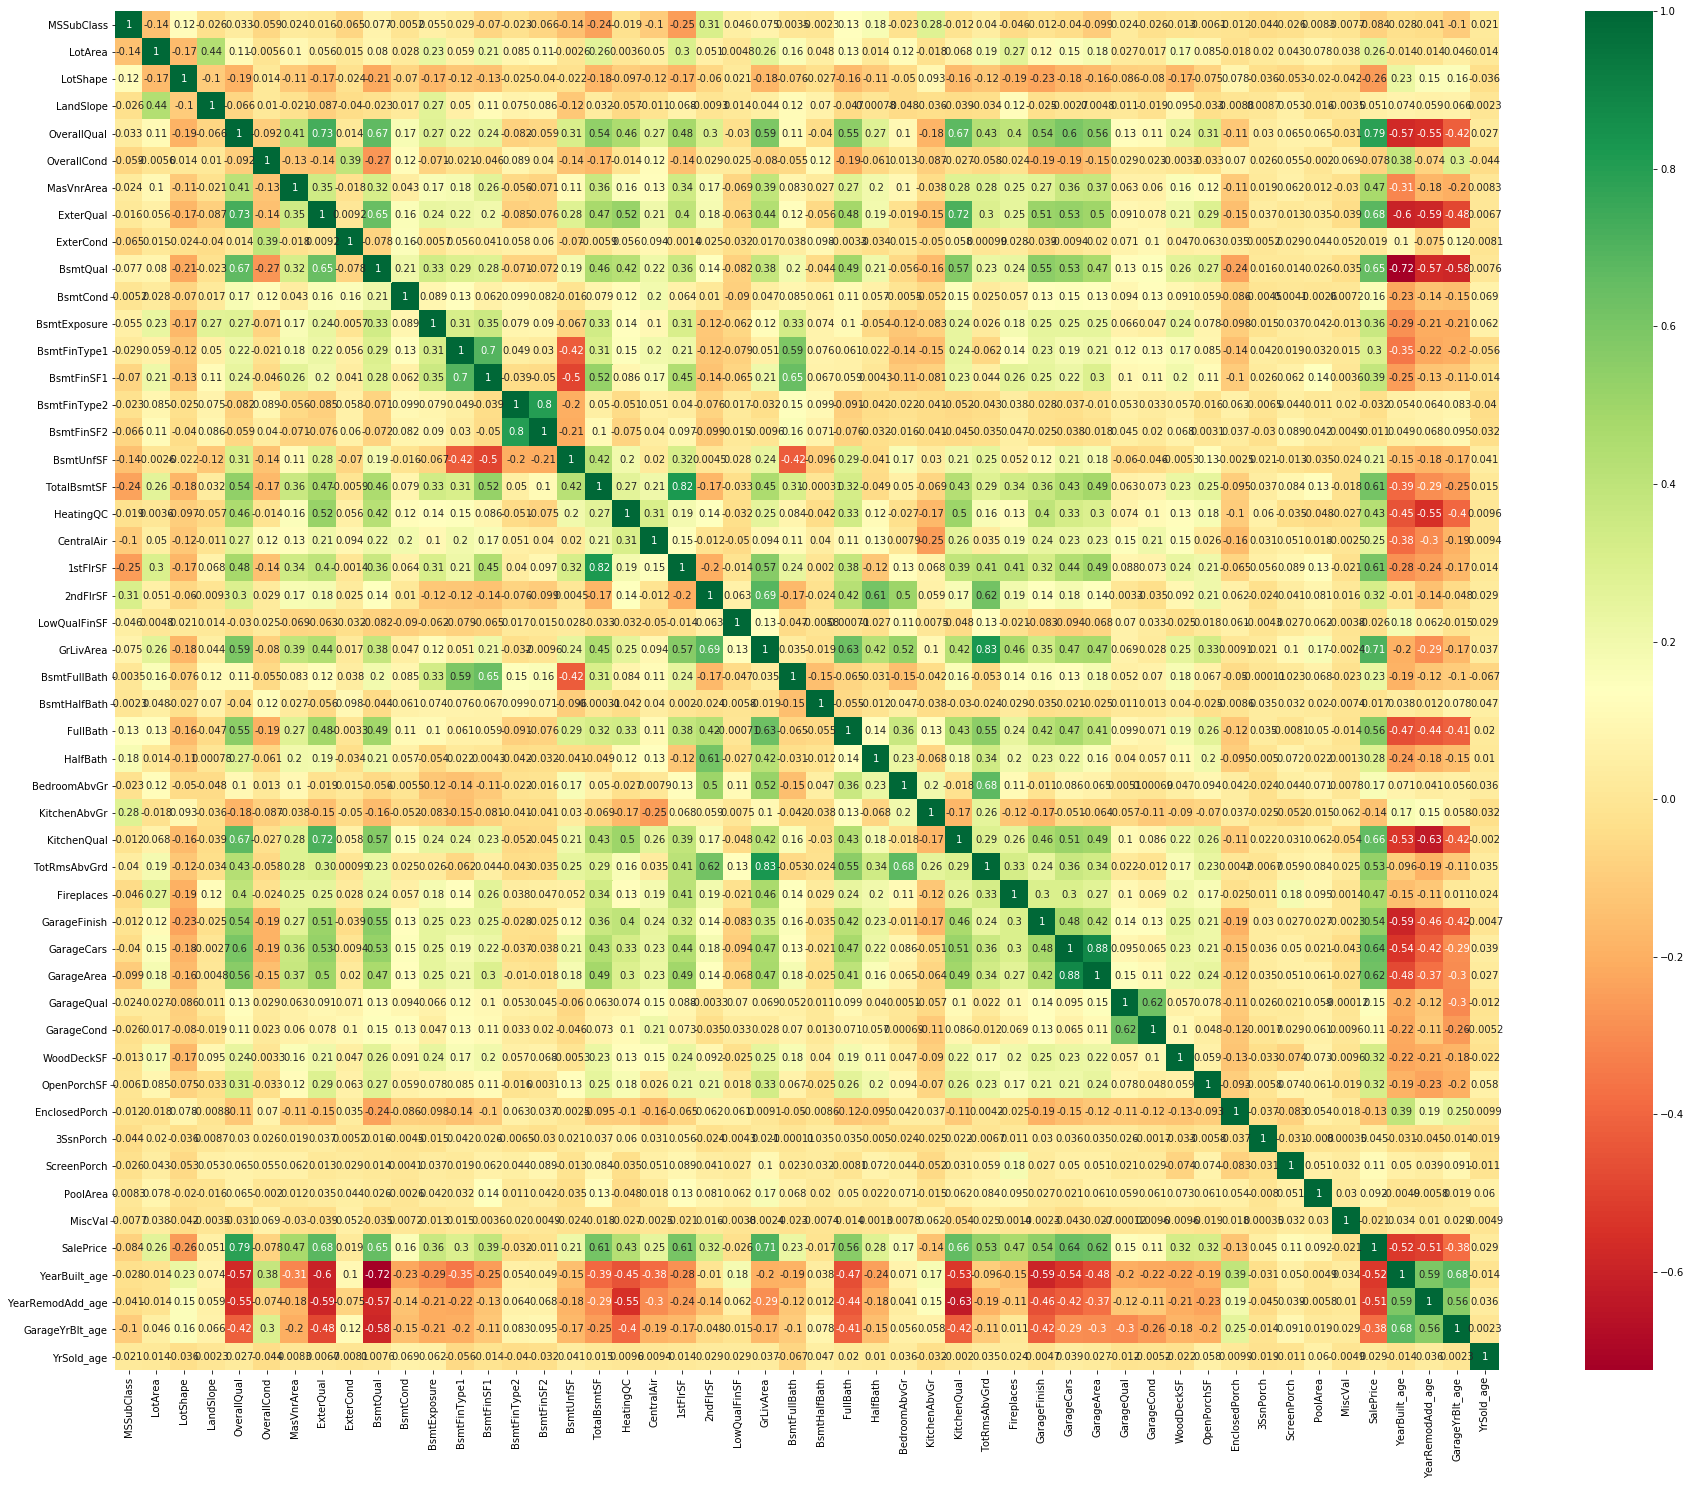

In [160]:
# Plotting the correlation heatmap

plt.figure(figsize=(31, 25))

sns.heatmap(numeric_df.corr(), annot=True, cmap="RdYlGn")
plt.show()

Here we can see that variables such as 
- `OverallQual`, `ExterQual`, `GrLivArea`, `GarageArea`, `KitchenQual` are noticeably correlated with the target variable "SalePrice"
- `TotRmsAbvGrd` and `GrLivArea` are highly positively correlated (0.83)
- `1stFlrSF` and `TotalBsmtSF` are highly positively correlated (0.82)

With this information we now know that we can proceed with Regression

## Some More analysis and plots

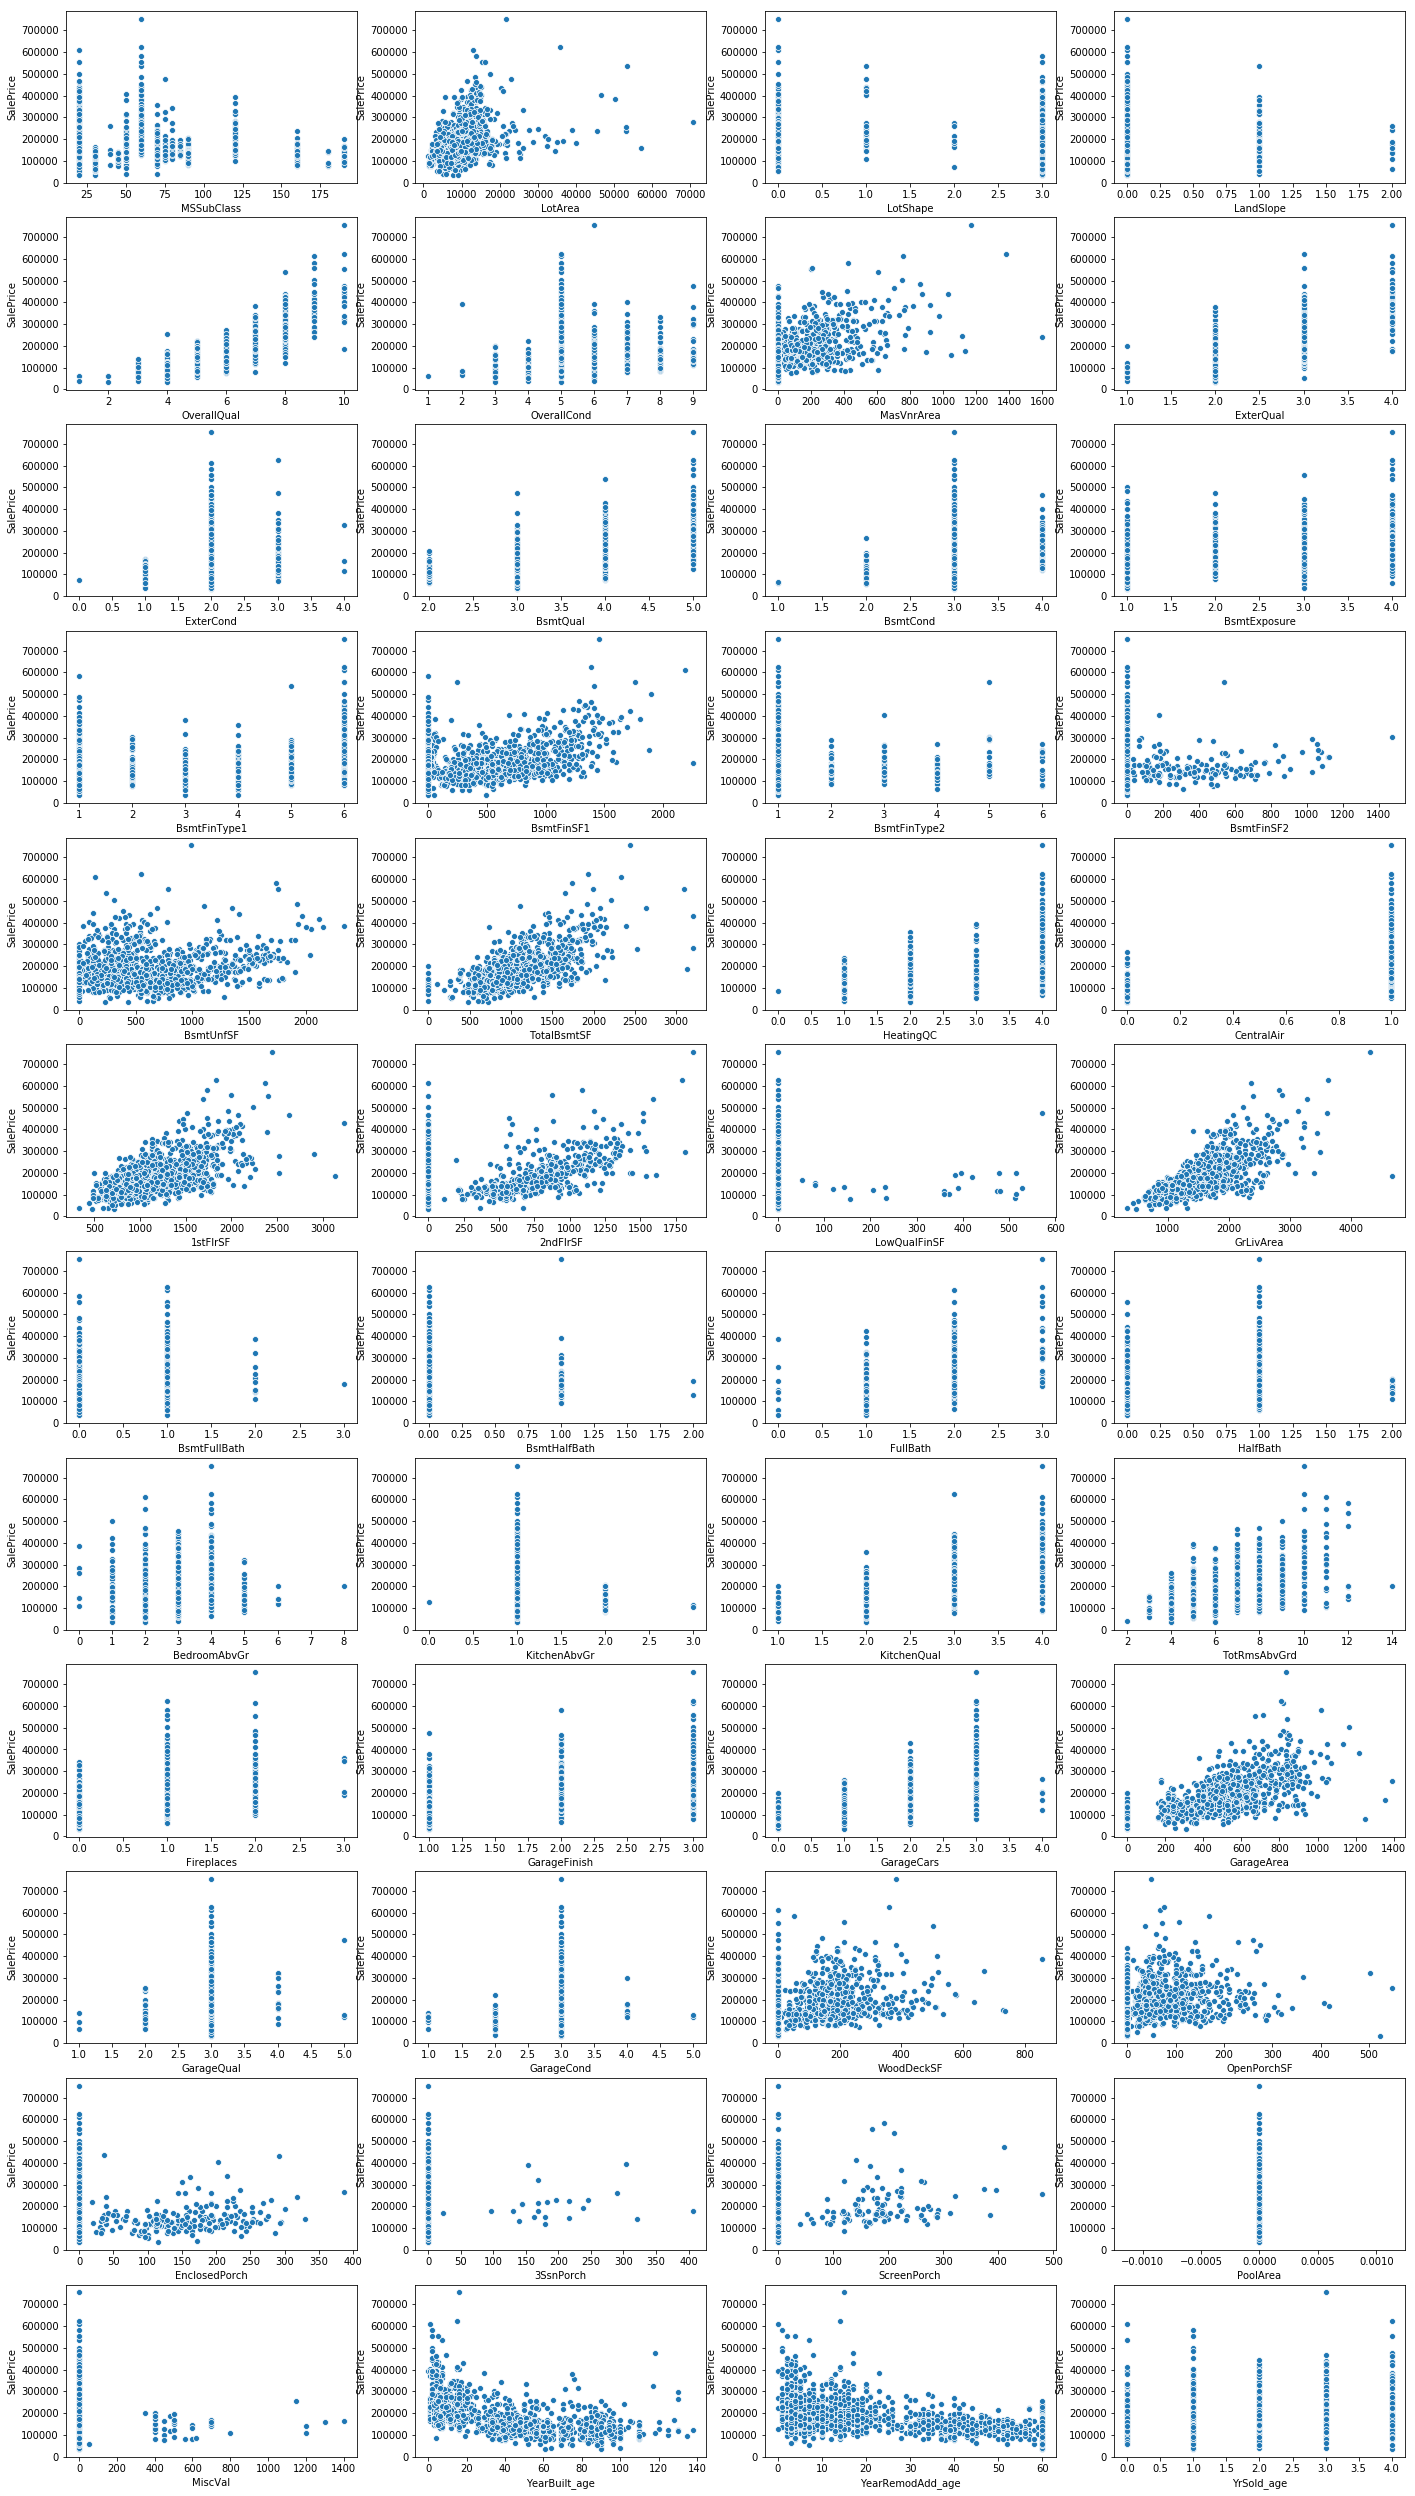

In [161]:
# Plotting numeric cols against SalePrice

plt.figure(figsize=(24, 45))

col_list =  numeric_df.drop(columns=["GarageYrBlt_age", "SalePrice"]).select_dtypes(include=["float64", "int64"]).columns

for idx, col in enumerate(col_list):
    plt.subplot(12, 4, idx + 1)
    sns.scatterplot(x=col, y="SalePrice", data=df)

plt.show()

These plots against the SalePrice confirm our assumptions from the correlation matrix

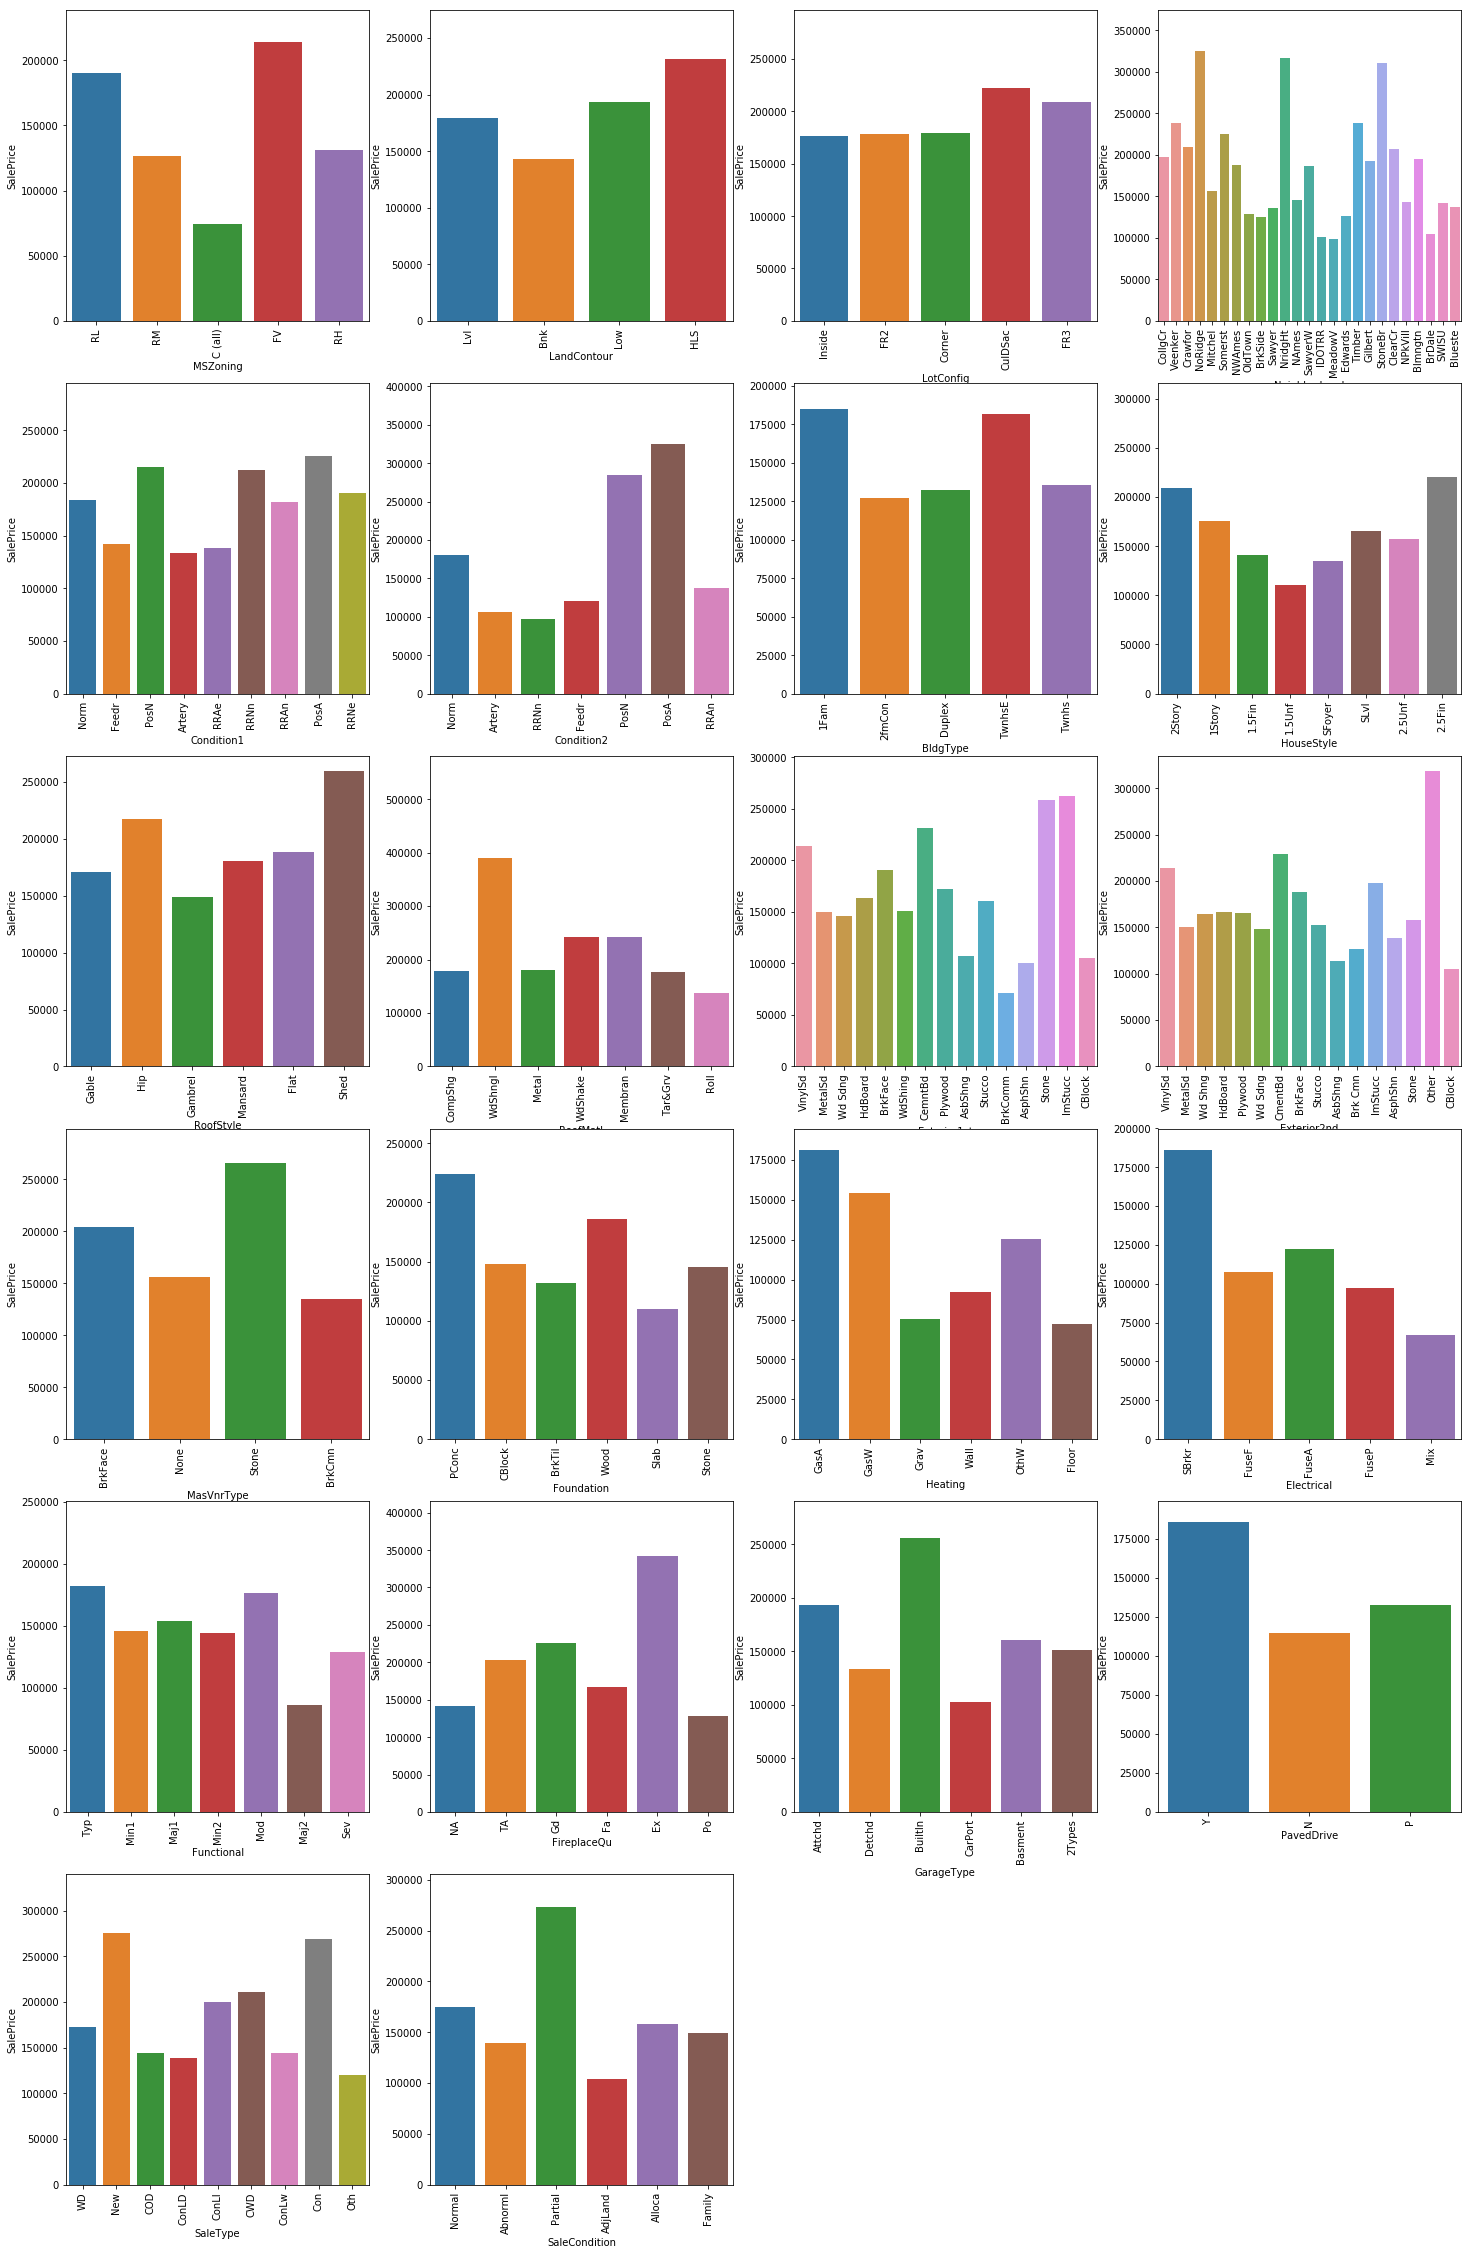

In [162]:
# Plotting categorical cols against SalePrice

plt.figure(figsize=(25, 40))

col_list =  df.select_dtypes(include=["object"]).columns

for idx, col in enumerate(col_list):
    plt.subplot(6, 4, idx + 1)
    plt.xticks(rotation=90)
    sns.barplot(x=col, y="SalePrice", data=df, errwidth=0)

plt.show()

Some Inferences from the above plots

- According to the zoning the price of houses seems to be high in "FV, Floating Village Residential" Area
- Houses in the Neighbourhood of Northridge, Northridge Heights and Stone Brook seem to have a higher sale price
- Newer and Contract 15% Down payment regular terms seems to have higher prices
- Houses having Standard Circuit Breakers & Romex seem to have higher price


## 3. Dummy Variable Creation

We have to create dummy variables for the categorical variables

In [163]:
# Retaining the columns which are categorical

cols_for_dummies = df.select_dtypes(include=["object"])

cols_for_dummies.columns

Index(['MSZoning', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating',
       'Electrical', 'Functional', 'FireplaceQu', 'GarageType', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [164]:
# Creating the dummy cols

dummies = pd.get_dummies(df[cols_for_dummies.columns], drop_first=True)

dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NA,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,

In [165]:
df_mod = pd.concat([df, dummies], axis=1)

df_mod.head()

,Id,MSSubClass,MSZoning,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,SalePrice,YearBuilt_age,YearRemodAdd_age,GarageYrBlt_age,YrSold_age,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NA,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,RL,8450,3,Lvl,Inside,0,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,3,2,PConc,4,3,1,6,706,1,0,150,856,GasA,4,1,SBrkr,856,854,0,1710,1,0,2,1,3,1,3,8,Typ,0,NA,Attchd,2,2,548,3,3,Y,0,61,0,0,0,0,0,WD,Normal,208500,7,7,7.0,2,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,2,20,RL,9600,3,Lvl,FR2,0,Veenker,Feedr,Norm,1Fam,1St

In [166]:
# Dropping the categorical columns

df_mod.drop(columns=cols_for_dummies.columns, inplace=True)

df_mod.shape

(1441, 199)

In [167]:
# Dropping Id as well

df_mod.drop(columns=["Id"], inplace=True)

df_mod.head()

,MSSubClass,LotArea,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,YearBuilt_age,YearRemodAdd_age,GarageYrBlt_age,YrSold_age,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NA,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,3,0,7,5,196.0,3,2,4,3,1,6,706,1,0,150,856,4,1,856,854,0,1710,1,0,2,1,3,1,3,8,0,2,2,548,3,3,0,61,0,0,0,0,0,208500,7,7,7.0,2,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,9600,3,0,6,8,0.0,2,2,4,3,4,5,978,1,0,284,1262,4,1,1262,0,0,1262,0,1,2,0,3,1,2,6,1,2,2,460,3,3,298,0,0,0,0,0,0,181500,34,34,34.0,3,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0

## 4. Model Building

In [168]:
# Splitting into train and test data

df_train, df_test = train_test_split(df_mod, test_size=0.3, random_state=42)

In [169]:
# selecting the columns to scale

to_scale = [
    'MSSubClass', 'LotArea', 'OverallQual', 
    'OverallCond', 'MasVnrArea','BsmtFinSF1', 
    'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF',
    '1stFlrSF','2ndFlrSF', 'LowQualFinSF',
    'GrLivArea','BsmtFullBath','BsmtHalfBath',
    'FullBath','HalfBath','BedroomAbvGr', 
    'KitchenAbvGr','TotRmsAbvGrd','Fireplaces',
    'GarageCars', 'GarageArea','WoodDeckSF',
    'OpenPorchSF','EnclosedPorch','3SsnPorch',
    'ScreenPorch','PoolArea','MiscVal', 
    'YearBuilt_age', 'YearRemodAdd_age', 
    'GarageYrBlt_age', 'YrSold_age', 'SalePrice'
]

to_scale

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'YearBuilt_age',
 'YearRemodAdd_age',
 'GarageYrBlt_age',
 'YrSold_age',
 'SalePrice']

In [170]:
# Scaling the continous variables in train and test set

scaler = StandardScaler()

df_train.loc[:, to_scale] = scaler.fit_transform(df_train[to_scale])

df_test.loc[:, to_scale] = scaler.transform(df_test[to_scale])


In [171]:
# Dividing the train and test sets to appropriate sets

X_train = df_train.drop(columns=["SalePrice"])
y_train = df_train["SalePrice"]

X_test = df_test.drop(columns=["SalePrice"])
y_test = df_test["SalePrice"]

In [172]:
# Using Recursive Feature eliminaton for feature selection

lr = LinearRegression()

rfe = RFE(lr, n_features_to_select = 70)

rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=70)

In [173]:
rfe_scores = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))
rfe_scores.columns = ['Column_Names','Status','Rank']

In [174]:
rfe_cols = list(rfe_scores[rfe_scores.Status==True].Column_Names)

X_train = X_train[rfe_cols]
X_test = X_test[rfe_cols]

#### 4.1 Training a Linear Regression model

In [175]:
lrm = LinearRegression()

lrm.fit(X_train, y_train)

LinearRegression()

In [176]:
lrm.coef_

array([ 2.14280713e-01,  1.14109575e-01,  1.77845760e-01, -5.91649376e+10,
       -2.42669641e+10, -6.01305226e+10,  5.65546824e+10, -2.35499308e+11,
       -2.83191600e+11, -3.25471722e+10,  3.30500244e+11,  1.50880623e-01,
       -5.79083762e+09,  3.08113765e-01,  2.42344253e-01,  1.07595992e-01,
       -1.28847196e-01,  2.04420418e-01,  4.23306861e-01,  1.61752122e-01,
        2.85318041e-01, -1.16944431e-01,  2.54661436e-01,  3.10112343e-01,
        4.97484477e-01,  3.25860862e-01, -1.91938616e-01, -2.54191445e-01,
        3.04030381e+08, -2.92903104e+00, -4.01555228e-01, -2.81556989e-01,
       -1.25983469e-01, -2.99194336e-01,  5.07705688e-01,  7.78564453e-01,
        3.11248779e-01, -5.51925659e-01,  1.86915588e+00,  2.26333618e-01,
       -5.16526000e+08,  2.49496460e-01, -5.38502419e+06,  1.89037323e-01,
       -2.92995453e-01,  5.16526000e+08, -1.58996582e-01, -1.98597908e-01,
        1.37176514e-01,  2.21794128e-01,  2.01362610e-01,  1.48834229e-01,
        5.65763080e+09,  

In [177]:
# Train R2 score
y_pred_train = lrm.predict(X_train[rfe_cols])

r2_train = r2_score(y_train, y_pred_train)
print(r2_train)

0.8968170063293656


In [178]:
# Prediction on Test Data

y_pred_test = lrm.predict(X_test[rfe_cols])

r2_test = r2_score(y_test, y_pred_test)
print(r2_test)


-2.263478968700026e+17


 - We can see here that the test r2 score is drastically lower than the train score. This indicates that the linear regression model has been overfit
 - We will proceed with the regularization techniques now

### 4.2 Ridge Regression

We will be using the RFE cols obtained from the Linear regression model

#### 4.2.1 Training a Ridge Regression model with an arbitrary Lambda value

In [179]:
l = 0.01

ridgereg = Ridge(alpha=l)
ridgereg.fit(X_train, y_train)

Ridge(alpha=0.01)

In [180]:
ridgereg.coef_

array([ 0.21422214,  0.11404889,  0.17769965,  0.13077788,  0.03349774,
       -0.02279241,  0.12695383,  0.10007433,  0.12527717, -0.01010191,
        0.17765823,  0.1510206 ,  0.        ,  0.30746529,  0.24170067,
        0.10705411, -0.12782796,  0.20451128,  0.41991022,  0.16083989,
        0.28532323, -0.11682767,  0.25351509,  0.31042779,  0.49734924,
        0.32586021, -0.19178574, -0.2530242 ,  0.        , -2.91192024,
       -0.40070843, -0.28129347, -0.12468597, -0.29886658,  0.50144766,
        0.76880334,  0.30695191, -0.54553318,  1.86381786,  0.22609643,
       -0.05245646,  0.2477006 ,  0.        ,  0.18825822, -0.29138858,
       -0.05245646, -0.1582829 , -0.1977874 ,  0.13738434,  0.22211681,
        0.20138634,  0.14917423,  0.07477345, -0.06264312, -0.08751329,
        0.        ,  0.07538297, -0.70959556,  0.18513237,  0.10763327,
        0.17247535,  0.21113172,  0.21348177,  0.10646767,  0.23367077,
       -0.2914144 ,  0.73648175,  0.60354207,  0.18472705, -0.27

In [181]:
y_pred_train = ridgereg.predict(X_train)

r2_train = r2_score(y_train, y_pred_train)
print(round(r2_train, 2))

0.9


In [182]:
y_pred_test = ridgereg.predict(X_test)

r2_test = r2_score(y_test, y_pred_test)
print(round(r2_test, 2))

0.83


#### 4.2.2 Using GridSearchCV for hyperparameter tuning for choosing the best Lambda value

In [183]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

ridge = Ridge()

# cross validation
folds = KFold(n_splits=10, shuffle=True, random_state=42)
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:    2.5s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [184]:
# taking a look at the mean train and test scores along with the alpha parameter value

cv_result = pd.DataFrame(model_cv.cv_results_)
cv_result['param_alpha'] = cv_result['param_alpha'].astype('float')

cv_result[['mean_train_score', 'mean_test_score', 'param_alpha']].head()

,mean_train_score,mean_test_score,param_alpha
0,0.898861,0.834903,0.0001
1,0.898861,0.834937,0.0010
2,0.898860,0.835267,0.0100
3,0.898828,0.836581,0.0500
4,0.898740,0.837934,0.1000


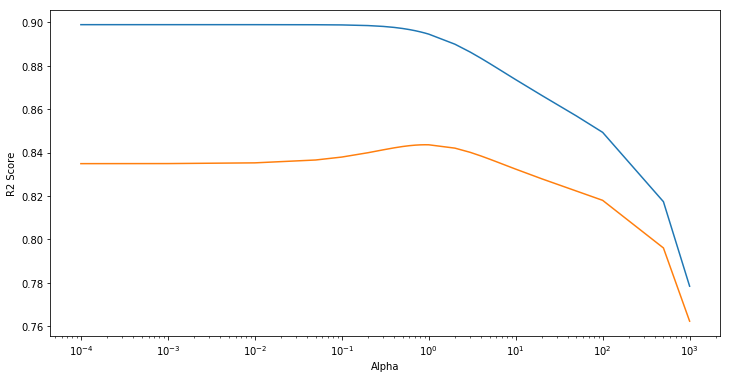

In [185]:
# Plotting the alpha value against r2 score

plt.figure(figsize=(12,6))
plt.plot(cv_result['param_alpha'], cv_result['mean_train_score'])
plt.plot(cv_result['param_alpha'], cv_result['mean_test_score'])
plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.show()

Choosing the best parameter according to the above plot

In [186]:
model_cv.best_params_

{'alpha': 0.9}

In [187]:
# Using ALpha value 0.9 for ridge regression

a = model_cv.best_params_['alpha']

ridge = Ridge(alpha=a, random_state=42)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 0.22495425  0.10995674  0.17441134  0.12871401  0.03427797 -0.02303768
  0.12486872  0.09662515  0.12325749 -0.00900807  0.17357765  0.15443343
  0.          0.25877682  0.2027647   0.0738066  -0.06783198  0.21018977
  0.24703211  0.11211593  0.27817763 -0.11201008  0.18643724  0.32239253
  0.47822189  0.31016543 -0.17592439 -0.17977278  0.         -1.93024
 -0.35338491 -0.26010083 -0.0614948  -0.27327498  0.23276657  0.36070125
  0.12432086 -0.27036671  1.48755319  0.21714837 -0.03100184  0.14973166
  0.          0.14256991 -0.19777366 -0.03100184 -0.12434645 -0.14597819
  0.12225998  0.20842465  0.1770578   0.15418667  0.06881977 -0.0550121
 -0.07492209  0.          0.06111441 -0.33607     0.17487475  0.02907498
  0.0631477   0.12444335  0.03581485  0.01706821  0.1473426  -0.23830224
  0.46711332  0.3054271   0.15922536 -0.04500458]


In [188]:
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)


r2_train = r2_score(y_train, y_pred_train)
print("Train R-squared score : ", round(r2_train, 2))

r2_test = r2_score(y_test, y_pred_test)
print("Test R-squared score : ", round(r2_test, 2))


Train R-squared score :  0.89
Test R-squared score :  0.84


We can clearly observe that Ridge regression has greatly improved the test score

In [189]:
# Residual Sum of Squares and Mean Squared Error for the Ridge model

rss = np.sum(np.square(y_train - y_pred_train))
print("Residual Sum of Squares :", rss)

mse = mean_squared_error(y_train, y_pred_train)
print("Mean Squared Error :", mse)

rss = np.sum(np.square(y_test - y_pred_test))
print("Residual Sum of Squares :", rss)

mse = mean_squared_error(y_test, y_pred_test)
print("Mean Squared Error :", mse)

Residual Sum of Squares : 107.1141832681163
Mean Squared Error : 0.10626407070249634
Residual Sum of Squares : 65.92145473130964
Mean Squared Error : 0.15224354441411


In [190]:
# Prominent columns

coeff_df = pd.DataFrame({"Columns" : rfe_cols, "Coeffs" : ridge.coef_})

# Sorting coeffs in descending
coeff_df = coeff_df.sort_values(by=['Coeffs'], ascending=False)

coeff_df.head()

,Columns,Coeffs
38,RoofMatl_WdShngl,1.487553
24,Neighborhood_NridgHt,0.478222
66,SaleType_New,0.467113
35,RoofMatl_Membran,0.360701
23,Neighborhood_NoRidge,0.322393


### 4.3 Lasso Regression

#### 4.3.1 Using Hyperparameter tuning for the best lambda value

In [191]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

lasso = Lasso()

# cross validation
folds = KFold(n_splits=10, shuffle=True, random_state=42)
model_cv_l = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2',  
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)            

model_cv_l.fit(X_train, y_train)

Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:    3.0s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [192]:
# taking a look at the mean train and test scores along with the alpha parameter value

cv_result_l = pd.DataFrame(model_cv_l.cv_results_)
cv_result_l['param_alpha'] = cv_result_l['param_alpha'].astype('float32')
cv_result_l[['mean_train_score', 'mean_test_score', 'param_alpha']].head()

,mean_train_score,mean_test_score,param_alpha
0,0.898622,0.835604,0.0001
1,0.892267,0.833993,0.0010
2,0.840884,0.807572,0.0100
3,0.814119,0.790391,0.0500
4,0.786126,0.765098,0.1000


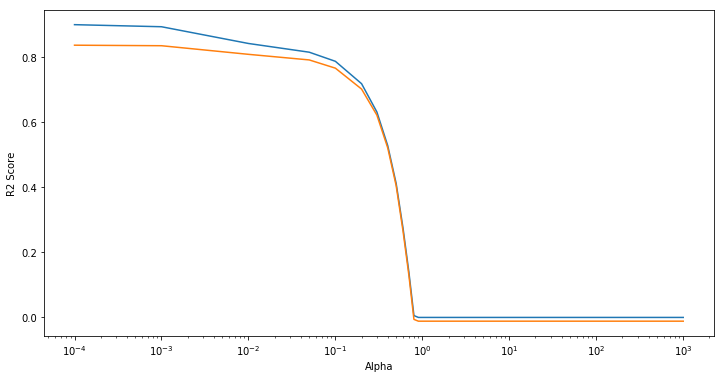

In [193]:
# Plotting the alpha value against r2 score

plt.figure(figsize=(12, 6))
plt.plot(cv_result_l['param_alpha'], cv_result_l['mean_train_score'])
plt.plot(cv_result_l['param_alpha'], cv_result_l['mean_test_score'])
plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.show()

choosing the best param according to the above plot

In [194]:
model_cv_l.best_params_

{'alpha': 0.0001}

In [195]:
# Using Alpha 0.0001 to fit the model

a = model_cv_l.best_params_['alpha']

lasso = Lasso(alpha=a, random_state=42)

lasso.fit(X_train[rfe_cols], y_train)
print(lasso.coef_)

[ 2.18537711e-01  1.14984152e-01  1.79147191e-01  1.93430848e-01
  5.93879075e-02  3.96319254e-02  6.59076046e-02  1.88924897e-01
  2.31979247e-01  1.07944656e-03  5.08090249e-02  1.50287758e-01
  0.00000000e+00  2.74517648e-01  2.17026818e-01  8.29051011e-02
 -1.13343231e-01  2.07578624e-01  3.49836419e-01  1.32499161e-01
  2.80331609e-01 -1.13123639e-01  2.24042340e-01  3.08488185e-01
  4.91952243e-01  3.14037111e-01 -1.83001865e-01 -2.04356508e-01
  0.00000000e+00 -2.87238832e+00 -3.80709372e-01 -2.72862486e-01
 -9.29939322e-02 -2.89362581e-01  3.88255157e-01  6.47076158e-01
  1.89002844e-01 -4.39416272e-01  1.83098715e+00  2.22704374e-01
 -0.00000000e+00  1.66820763e-01  0.00000000e+00  1.43848418e-01
 -2.41980741e-01 -0.00000000e+00 -7.93703561e-02 -1.51879315e-01
  1.14690658e-01  2.02681052e-01  1.72381538e-01  1.53600122e-01
  1.01493374e-01 -2.69823957e-02 -3.14998412e-02  0.00000000e+00
  6.57915227e-02 -5.88626334e-01  1.77951094e-01  2.27625452e-03
  4.60931970e-02  1.06753

In [196]:
# coeffs and columns side by side

coeff_df = pd.DataFrame({"Columns" : rfe_cols, "Coeffs" : lasso.coef_})

# Sorting coeffs in descending
coeff_df = coeff_df.sort_values(by=['Coeffs'], ascending=False)

coeff_df.head()

,Columns,Coeffs
38,RoofMatl_WdShngl,1.830987
35,RoofMatl_Membran,0.647076
66,SaleType_New,0.615312
67,SaleType_Oth,0.499319
24,Neighborhood_NridgHt,0.491952


In [197]:
y_pred_train_l = lasso.predict(X_train)
y_pred_test_l = lasso.predict(X_test)

r2_train_l = r2_score(y_train, y_pred_train_l)
print("Train R-squared score : ", round(r2_train_l, 2))

r2_test_l = r2_score(y_test, y_pred_test_l)
print("Test R-squared score : ", round(r2_test_l, 2))

Train R-squared score :  0.9
Test R-squared score :  0.84


In [198]:
# Residual Sum of Squares and Mean Squared Error for the Lasso model

rss = np.sum(np.square(y_train - y_pred_train_l))
print("Residual Sum of Squares :", rss)

mse = mean_squared_error(y_train, y_pred_train_l)
print("Mean Squared Error :", mse)

rss = np.sum(np.square(y_test - y_pred_test_l))
print("Residual Sum of Squares :", rss)

mse = mean_squared_error(y_test, y_pred_test_l)
print("Mean Squared Error :", mse)

Residual Sum of Squares : 104.26348612765071
Mean Squared Error : 0.10343599814251063
Residual Sum of Squares : 68.79345001313317
Mean Squared Error : 0.1588763279749034


### 4.4 Choosing the better model and identifying the driver variables for Sale Price

By comparing the R2 Scores and the Mean Squared error of both Ridge and Lasso model, we can see that Lasso model performs better and with the benefit of feature selection

According to the coefficients obtained from the Lasso model with the value of alpha : `0.001`

- RoofMatl_WdShngl	
- RoofMatl_Membran	
- SaleType_New	
- SaleType_Oth	
- Neighborhood_NridgHt	

are the 5 main variables in the model


The Ridge model had yielded very similar results with the alpha : `0.9`

- RoofMatl_WdShngl
- Neighborhood_NridgHt
- SaleType_New
- RoofMatl_Membran
- Neighborhood_NoRidge

From EDA we could infer that houses in the Neighbourhood of NorthRidge and NorthRidge heights had higher prices, We can see that both the models had higher coefficients fror atleast one of these columns